Dataset Shape: (11162, 17)

Column Names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

First 5 rows:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    

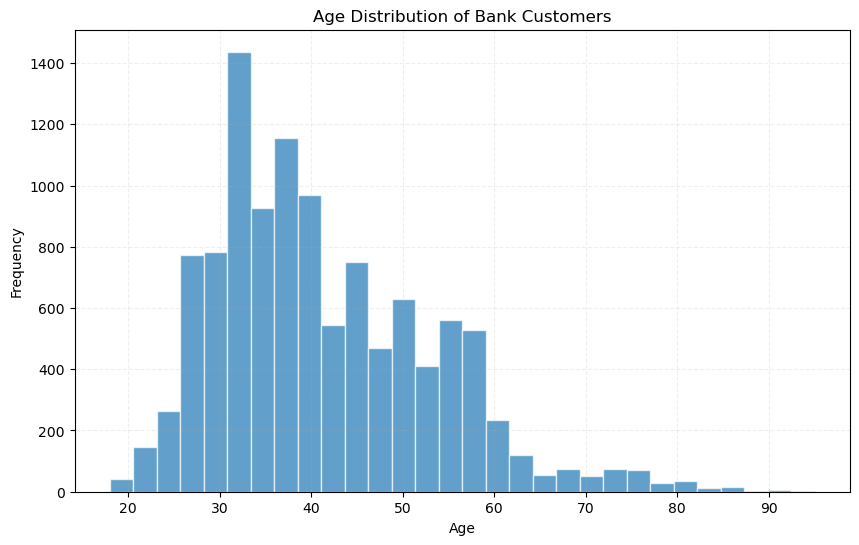

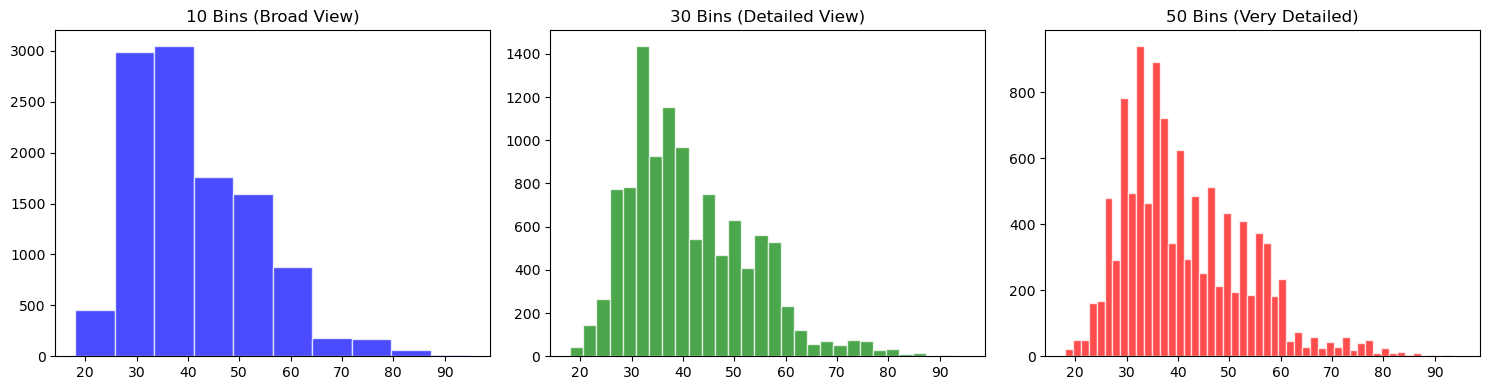


Campaign Success Rate by Job Type:
job
student          74.722222
retired          66.323907
unemployed       56.582633
management       50.701481
unknown          48.571429
admin.           47.301349
self-employed    46.172840
technician       46.077894
services         39.978332
housemaid        39.781022
entrepreneur     37.500000
blue-collar      36.419753
Name: deposit, dtype: float64

Campaign Success Rate by Education Type:
education
tertiary     54.106804
unknown      50.704225
secondary    44.740687
primary      39.400000
Name: deposit, dtype: float64

Campaign Success Rate by Marital Status:
marital
divorced    48.105182
married     43.378995
single      54.349062
Name: deposit, dtype: float64

Most profitable customer profile:
job          education
management   tertiary     1134
technician   secondary     518
admin.       secondary     502
blue-collar  secondary     433
services     secondary     296
technician   tertiary      286
blue-collar  primary       218
retired    

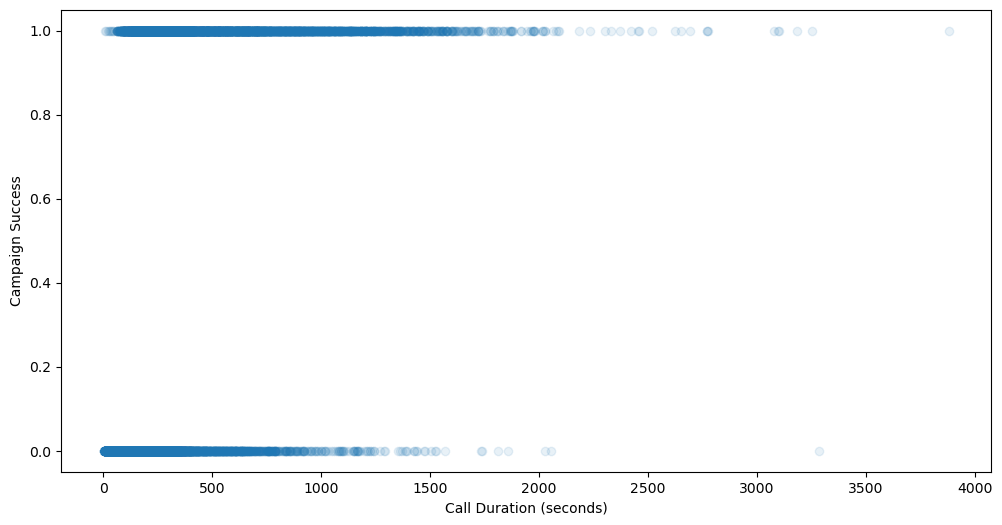

In [62]:
# Day 1: Banking Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the banking dataset
df = pd.read_csv('bank-additional-full.csv', sep=',')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

# First 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Data types and missing values
print("\nData Info:")
print(df.info())

# Basic statistics for numerical columns
print("\nNumerical Statistics:")
print(df.describe())

# Check the target variable (y = campaign outcome)
print("\nCampaign Success Rate:")
print(df['deposit'].value_counts(normalize=True) * 100)

# Simple visualization - Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, alpha=0.7, edgecolor='white')
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.2, linestyle='--')
plt.show()

# Compare different bin sizes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Few bins (broad view)
axes[0].hist(df['age'], bins=10, alpha=0.7, color='blue', edgecolor='white')
axes[0].set_title('10 Bins (Broad View)')

# Medium bins (your original)
axes[1].hist(df['age'], bins=30, alpha=0.7, color='green', edgecolor='white')
axes[1].set_title('30 Bins (Detailed View)')

# Many bins (very detailed)
axes[2].hist(df['age'], bins=50, alpha=0.7, color='red', edgecolor='white')
axes[2].set_title('50 Bins (Very Detailed)')

plt.tight_layout()
plt.show()

# Campaign success by job type
campaign_by_job = df.groupby('job')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nCampaign Success Rate by Job Type:")
print(campaign_by_job.sort_values(ascending=False))

# 1. Which education level responds best to campaigns?
education_success = df.groupby('education')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nCampaign Success Rate by Education Type:")
print(education_success.sort_values(ascending=False))

# 2. Does marital status affect campaign success?
marital_success = df.groupby('marital')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nCampaign Success Rate by Marital Status:")
print(marital_success)

# 3. What's the most profitable customer profile?
print("\nMost profitable customer profile:")
customer_profile = df.groupby(['job', 'education'])['deposit'].apply(lambda x: (x=='yes').sum()).sort_values(ascending=False).head(10)
print(customer_profile)

# 4. Do customers with loans respond differently?
loan_analysis = df.groupby(['housing', 'loan'])['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nTypes of loans:")
print(loan_analysis)

# 5. How does account balance affect success rates?
df['balance_group'] = pd.cut(df['balance'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
balance_success = df.groupby('balance_group', observed=True)['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nBalance vs Success Rate:")
print(balance_success)

# 6. What's the best month to run campaigns?
monthly_success = df.groupby('month')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print("\nMonthly Success:")
print(monthly_success.sort_values(ascending=False))

# 7. What's the optimal call duration?
plt.figure(figsize=(12, 6))
plt.scatter(df['duration'], df['deposit'].map({'yes': 1, 'no': 0}), alpha=0.1)
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Campaign Success')

# 8. How many contacts are too many?
campaign_success = df.groupby('campaign')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)

In [88]:
# 9. Which contact method works best?
contact_success = df.groupby('contact')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print('Contact Method Summary')
print(contact_success)

# 10. Does previous campaign outcome matter?
previous_impact = df.groupby('poutcome')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print('\nPrevious Outcome impact')
print(previous_impact)

# 11. Do customers with defaults behave differently?
default_analysis = df.groupby('default')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print('\nDefault Effect')
print(default_analysis)

# 12. What's the risk profile of successful customers?
risk_profile = df[df['deposit'] == 'yes'].groupby(['default', 'housing', 'loan']).size()
print('\nRisk profile of successful customers')
print(risk_profile)

# 13. Campaign efficiency by customer segment
efficiency = df.groupby('job').agg({
    'deposit': lambda x: (x=='yes').sum(),  # Success count
    'duration': 'mean',                     # Avg call time
    'campaign': 'mean'                      # Avg contacts needed
})
print('\nCampaign efficiency')
print(efficiency)

# 14. Customer lifetime value indicators
high_value_customers = df[(df['balance'] > df['balance'].quantile(0.75)) & 
                         (df['deposit'] == 'yes')]
print('\nCustomer lifetime value indicators')
print(high_value_customers)

# 17. Which existing customers are most likely to buy new products?
existing_customers = df[df['previous'] > 0]
cross_sell_potential = existing_customers.groupby(['job', 'poutcome'])['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100)
print('\nCross sell potential')
print(cross_sell_potential)

# 18. Customer acquisition cost optimization
df['contact_cost'] = df['campaign'] * 50  # Assume $50 per contact
successful_campaigns = df[df['deposit'] == 'yes']
avg_acquisition_cost = successful_campaigns.groupby('job')['contact_cost'].mean()
print('\nAverage acquisition cost')
print(avg_acquisition_cost)

Contact Method Summary
contact
cellular     54.327282
telephone    50.387597
unknown      22.591645
Name: deposit, dtype: float64

Previous Outcome impact
poutcome
failure    50.325733
other      57.169460
success    91.316527
unknown    40.667788
Name: deposit, dtype: float64

Default Effect
default
no     47.635074
yes    30.952381
Name: deposit, dtype: float64

Risk profile of successful customers
default  housing  loan
no       no       no      3120
                  yes      211
         yes      no      1648
                  yes      258
yes      no       no        15
                  yes        8
         yes      no        22
                  yes        7
dtype: int64

Campaign efficiency
               deposit    duration  campaign
job                                         
admin.             631  347.929535  2.376312
blue-collar        708  394.658951  2.541152
entrepreneur       123  370.182927  2.725610
housemaid          109  348.346715  2.689781
management        130

In [90]:
# Complete Business Intelligence Summary
print("=== BANK MARKETING CAMPAIGN ANALYSIS ===\n")

# Overall performance
total_customers = len(df)
successful_campaigns = (df['deposit'] == 'yes').sum()
success_rate = (successful_campaigns / total_customers) * 100

print(f"Overall Campaign Performance:")
print(f"  • Total Customers Contacted: {total_customers:,}")
print(f"  • Successful Conversions: {successful_campaigns:,}")
print(f"  • Overall Success Rate: {success_rate:.2f}%\n")

# Best segments
print("Top 3 Job Categories by Success Rate:")
top_jobs = df.groupby('job')['deposit'].apply(lambda x: (x=='yes').sum() / len(x) * 100).sort_values(ascending=False).head(3)
for job, rate in top_jobs.items():
    count = len(df[df['job'] == job])
    print(f"  • {job.title()}: {rate:.1f}% success rate ({count:,} customers)")

print(f"\nBest Month for Campaigns: {monthly_success.idxmax()} ({monthly_success.max():.1f}% success rate)")
print(f"Optimal Contact Method: {contact_success.idxmax()} ({contact_success.max():.1f}% success rate)")

=== BANK MARKETING CAMPAIGN ANALYSIS ===

Overall Campaign Performance:
  • Total Customers Contacted: 11,162
  • Successful Conversions: 5,289
  • Overall Success Rate: 47.38%

Top 3 Job Categories by Success Rate:
  • Student: 74.7% success rate (360 customers)
  • Retired: 66.3% success rate (778 customers)
  • Unemployed: 56.6% success rate (357 customers)

Best Month for Campaigns: dec (90.9% success rate)
Optimal Contact Method: cellular (54.3% success rate)
